In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Data Engineering

In [4]:
train_data= pd.read_csv('application_train.csv')

In [3]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [4]:
missing_values_table(train_data)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [5]:
train1=train_data.drop(columns=['NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE',
                                'LIVINGAPARTMENTS_MEDI','COMMONAREA_MEDI', 'COMMONAREA_MODE', 'FLOORSMIN_MEDI',
                                'FLOORSMIN_MODE', 'YEARS_BUILD_MEDI','YEARS_BUILD_AVG','LANDAREA_MEDI','LANDAREA_MODE',
                                'BASEMENTAREA_MEDI','BASEMENTAREA_MODE','NONLIVINGAREA_MEDI','NONLIVINGAREA_MODE',
                                'ELEVATORS_MEDI','ELEVATORS_MODE','LIVINGAREA_MEDI','LIVINGAREA_MODE', 'APARTMENTS_MODE', 
                                'APARTMENTS_MEDI', 'ENTRANCES_MEDI','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI',
                                'YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI', 'SK_ID_CURR'])

In [6]:
list_1=['COMMONAREA_AVG' , 'NONLIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_AVG','FLOORSMIN_AVG','YEARS_BUILD_MODE',
        'OWN_CAR_AGE','LANDAREA_AVG','BASEMENTAREA_AVG','NONLIVINGAREA_AVG','ELEVATORS_AVG','LIVINGAREA_AVG', 
       'APARTMENTS_AVG','ENTRANCES_AVG', 'FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_AVG',
        'TOTALAREA_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [7]:
for i in list_1:
    train1.loc[train1[i].isnull(), i]=-1

In [8]:
list_0 = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
          'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [9]:
for i in list_0:
    train1.loc[train1[i].isnull(), i]=0

In [10]:
missing_values_table(train1)

Your selected dataframe has 93 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
FONDKAPREMONT_MODE,210295,68.4
WALLSMATERIAL_MODE,156341,50.8
HOUSETYPE_MODE,154297,50.2
EMERGENCYSTATE_MODE,145755,47.4
OCCUPATION_TYPE,96391,31.3
NAME_TYPE_SUITE,1292,0.4
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0
DAYS_LAST_PHONE_CHANGE,1,0.0


In [11]:
train_dummy = pd.get_dummies(train1)

In [28]:
#for i in ['AMT_GOODS_PRICE','CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']
train_clean = train_dummy.dropna()

In [29]:
missing_values_table(train_clean)

Your selected dataframe has 217 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [30]:
train_data.shape

(307511, 122)

In [31]:
train_dummy.shape

(307511, 217)

In [32]:
train_clean.shape

(307220, 217)

In [33]:
train_clean=train_clean.drop(columns=['TARGET'])

In [34]:
train_clean.shape

(307220, 216)

In [46]:
train_clean =pd.DataFrame(train_clean)
train_clean.to_csv("train_clean.csv")

# PCA

In [35]:
from sklearn.preprocessing import StandardScaler
train_clean2 = StandardScaler().fit_transform(train_clean)

In [20]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'cumulative explained variance')

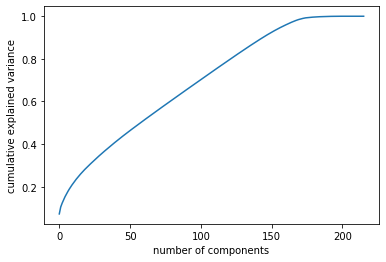

In [36]:
pca = PCA().fit(train_clean2) # 'data' can be changed here
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [37]:
pca=PCA(0.95).fit(train_clean2)
pca.n_components_

159

In [38]:
pca = PCA(n_components=3)
train_pca = pca.fit_transform(train_clean2)

In [44]:
train_pca =pd.DataFrame(train_pca)
train_pca.to_csv("train_pca.csv")

In [39]:
PCs = pd.DataFrame(pca.components_.T,columns=['PC-1','PC-2', 'PC-3'], index = train_clean.columns)

In [40]:
PCs

,PC-1,PC-2,PC-3
CNT_CHILDREN,-1.323870e-02,1.313757e-01,-2.725040e-03
AMT_INCOME_TOTAL,1.633009e-02,4.441870e-02,1.156386e-01
AMT_CREDIT,2.160830e-02,5.834712e-02,3.081243e-01
AMT_ANNUITY,2.370739e-02,7.791357e-02,3.007094e-01
AMT_GOODS_PRICE,2.259530e-02,5.894310e-02,3.097671e-01
REGION_POPULATION_RELATIVE,4.286521e-02,1.558073e-02,1.501054e-01
DAYS_BIRTH,-9.874085e-03,2.695057e-01,-1.189967e-01
DAYS_EMPLOYED,1.135157e-03,-3.504997e-01,1.129891e-01
DAYS_REGISTRATION,-2.027211e-02,1.133752e-01,-2.230592e-02
DAYS_ID_PUBLISH,-5.670754e-03,1.115713e-01,-8.344801e-02


In [41]:
PC_1= PCs.nlargest(5, 'PC-1')
PC_1.index.tolist()

['FLOORSMAX_AVG',
 'ENTRANCES_AVG',
 'APARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'TOTALAREA_MODE']

In [42]:
PC_2= PCs.nlargest(5, 'PC-2')
PC_2.index.tolist()

['FLAG_EMP_PHONE',
 'DAYS_BIRTH',
 'NAME_INCOME_TYPE_Working',
 'REG_CITY_NOT_WORK_CITY',
 'CNT_FAM_MEMBERS']

In [43]:
PC_3= PCs.nlargest(5, 'PC-3')
PC_3.index.tolist()

['AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'FLAG_OWN_CAR_Y',
 'CODE_GENDER_M']

In [28]:
PC_4= PCs.nlargest(5, 'PC-4')
PC_4.index.tolist()

['AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'DAYS_BIRTH',
 'DAYS_REGISTRATION',
 'HOUR_APPR_PROCESS_START']

In [29]:
PC_5= PCs.nlargest(5, 'PC-5')
PC_5.index.tolist()

['AMT_GOODS_PRICE',
 'AMT_CREDIT',
 'AMT_INCOME_TOTAL',
 'DAYS_LAST_PHONE_CHANGE',
 'NAME_CONTRACT_TYPE_Revolving loans']